In [28]:
#Importing packages (Pandas, matplotlib, seaborn) and visualization libraries/styles:

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

matplotlib.rcParams['figure.figsize'] = (12,8)

ds = pd.read_csv(r'c:\movies.csv')

In [29]:
# Viewing the first couple rows of the dataset:

ds.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [30]:
# Checking for Missing Values in Data and dropping Null Values:

for col in ds.columns:
    p_missing = np.mean(ds[col].isnull())
    print('{} = {}%'.format(col, p_missing))

ds = ds.dropna()


name = 0.0%
rating = 0.010041731872717789%
genre = 0.0%
year = 0.0%
released = 0.0002608242044861763%
score = 0.0003912363067292645%
votes = 0.0003912363067292645%
director = 0.0%
writer = 0.0003912363067292645%
star = 0.00013041210224308815%
country = 0.0003912363067292645%
budget = 0.2831246739697444%
gross = 0.02464788732394366%
company = 0.002217005738132499%
runtime = 0.0005216484089723526%


In [31]:
#Analyzing the data types for each column:

ds.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [32]:
#Transformation of data types:

ds['budget'] = ds['budget'].astype('int64')

ds['gross'] = ds['gross'].astype('int64')

ds['votes'] = ds['votes'].astype('int64')

In [33]:
#Creating New Column that contains correct release year:

ds['Correct_Year'] = ds['released'].astype(str).str[8:]

In [50]:
#Ordering the Columns by 'Gross' Revenue:

ds = ds.sort_values(by=['gross'], inplace=False, ascending=False)

In [35]:
#Look at the whole dataset:

pd.set_option('display.max_rows', None)

ds = ds.sort_values(by=['gross'], inplace=False, ascending=False)

In [51]:
#Drop duplicates within columns (Shows all unique values in dataset):

ds = ds.drop_duplicates()

<function matplotlib.pyplot.show(close=None, block=None)>

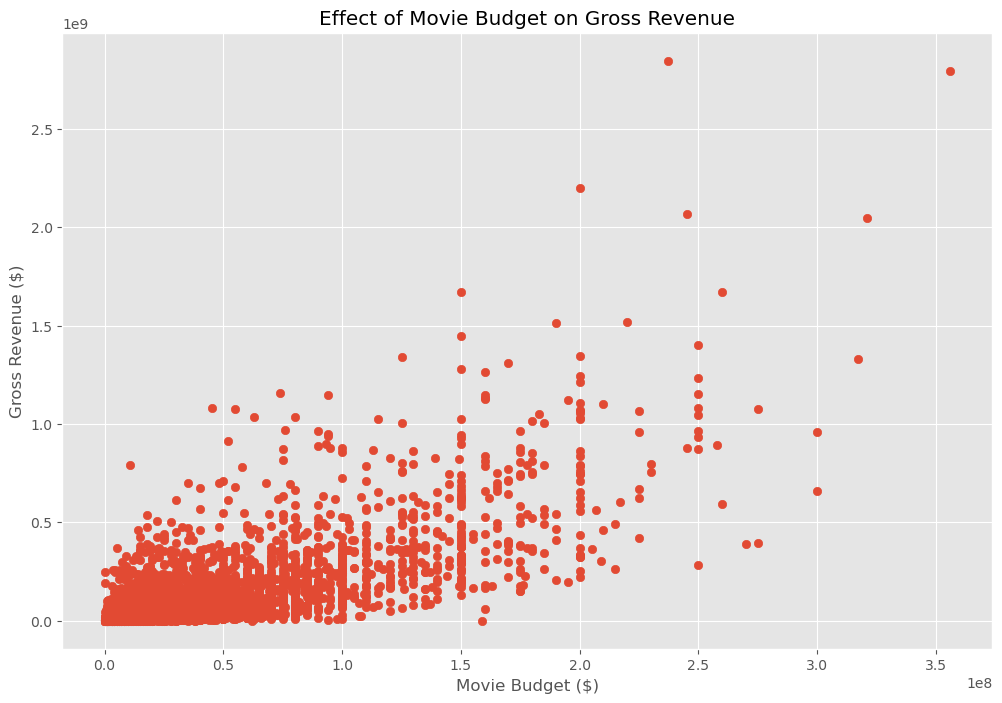

In [37]:
#Data visualization: Scatter Plot of Budget Vs. Gross Revenue From each Movie:

plt.scatter(x = ds['budget'], 
            y = ds['gross'])
plt.xlabel('Movie Budget ($)')
plt.ylabel('Gross Revenue ($)')
plt.title('Effect of Movie Budget on Gross Revenue')

plt.show


In [38]:
ds.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct_Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"18, 2009 (United States)"
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,", 2019 (United States)"
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"19, 1997 (United States)"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"18, 2015 (United States)"
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,", 2018 (United States)"


Text(0.5, 1.0, 'Effect of Movie Budget on Gross Revenue')

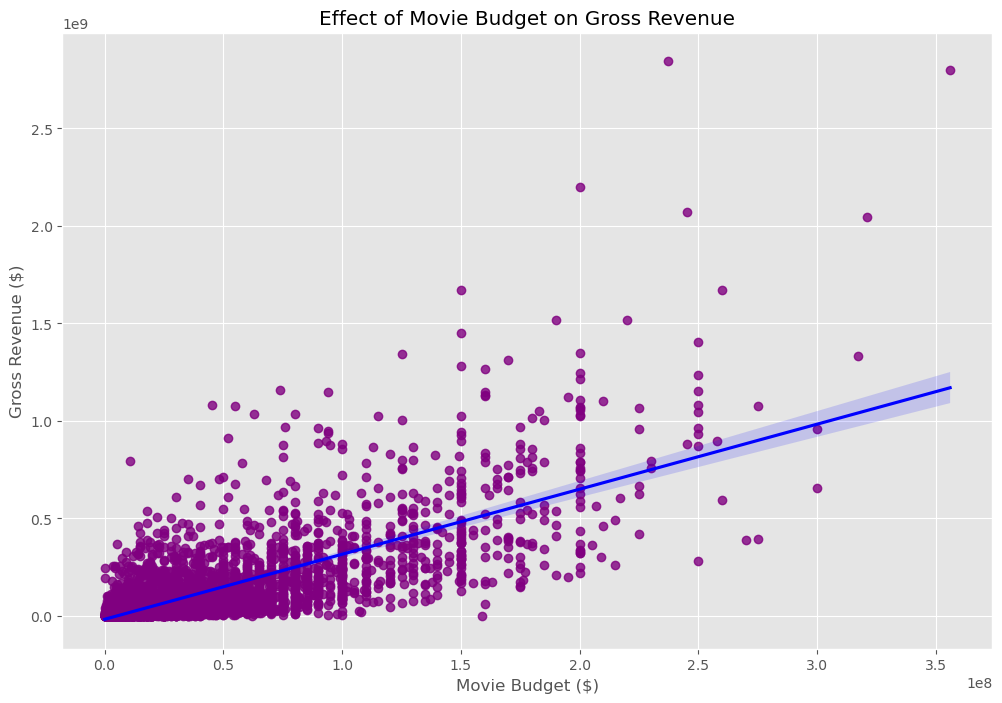

In [39]:
#Regression Analysis of Budget vs. Gross Revenue using Seaborn package:

sns.regplot(x='budget',y ='gross',data=ds, scatter_kws={"color": "Purple"}, line_kws={"color": "Blue"}) 
plt.xlabel('Movie Budget ($)')
plt.ylabel('Gross Revenue ($)')
plt.title('Effect of Movie Budget on Gross Revenue')        

In [40]:
#Pearson's Correlation:

ds.corr(method='pearson')

C:\Users\AnkitGG\AppData\Local\Temp\ipykernel_4980\1036314603.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [41]:
#Kendall's Correlation:

ds.corr(method='kendall')

C:\Users\AnkitGG\AppData\Local\Temp\ipykernel_4980\1913104086.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr(method='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [42]:
#Spearman Correlation:

ds.corr(method='spearman')

C:\Users\AnkitGG\AppData\Local\Temp\ipykernel_4980\1935478550.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ds.corr(method='spearman')


,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


In [43]:
#By looking through all correlations, the correlation coefficient for each method is very high between budget and gross revenue, suggesting a relationship between these two variables.

C:\Users\AnkitGG\AppData\Local\Temp\ipykernel_4980\73405966.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Correlation_matr = ds.corr(method='pearson')


<function matplotlib.pyplot.show(close=None, block=None)>

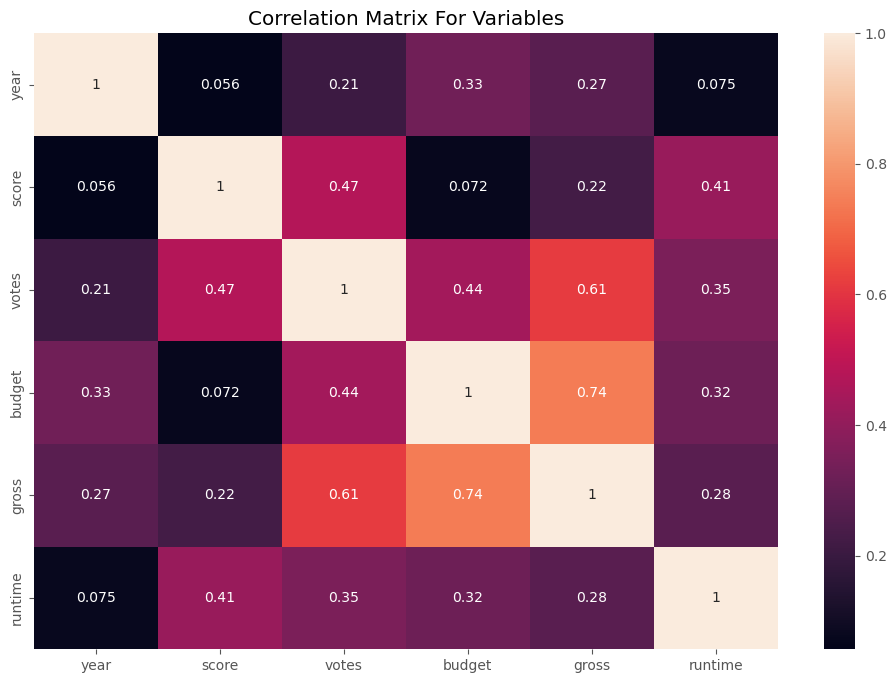

In [44]:
#Correlation Matrix/Heatmap Visualization for Pearson:

Correlation_matr = ds.corr(method='pearson')
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')
plt.title('Correlation Matrix For Variables') 

sns.heatmap(Correlation_matr, annot=True)

plt.show

In [45]:
#Changing all object, string data types in columns into numerical data types:

ds_numerical = ds

for col_name in ds_numerical.columns:
    if(ds_numerical[col_name].dtype== 'object'):
        ds_numerical[col_name] = ds_numerical[col_name].astype('category')
        ds_numerical[col_name] = ds_numerical[col_name].cat.codes
        
        

<function matplotlib.pyplot.show(close=None, block=None)>

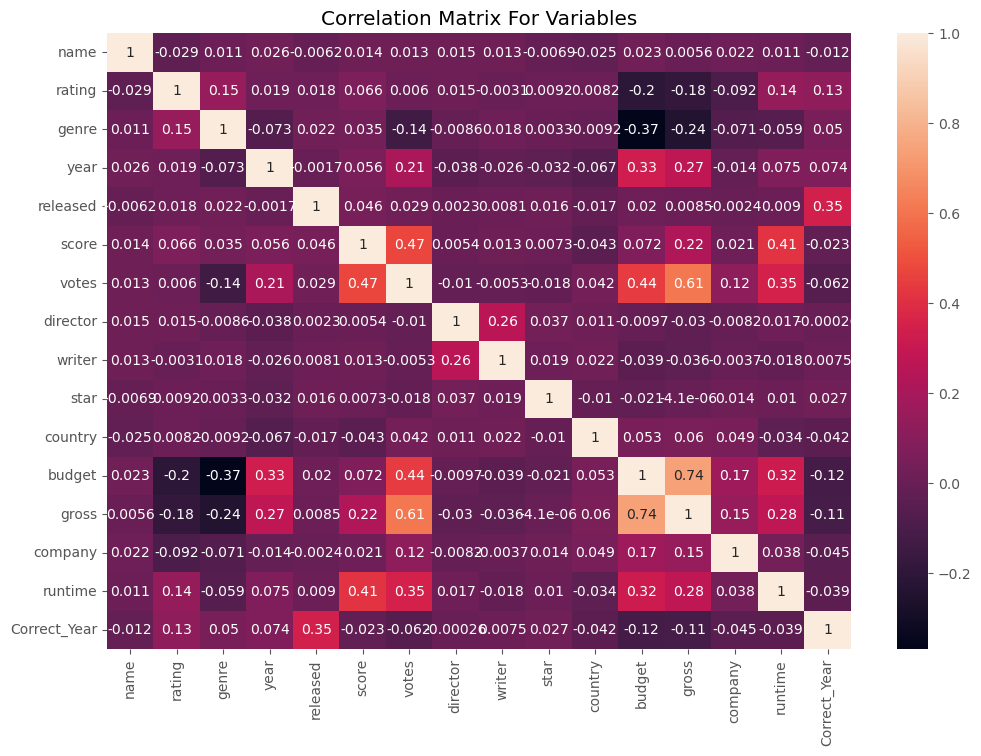

In [46]:
#Correlation Matrix For all numerical Variables in new Dataset created:

Correlation_matr = ds_numerical.corr(method='pearson')
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')
plt.title('Correlation Matrix For Variables') 

sns.heatmap(Correlation_matr, annot=True)

plt.show

In [47]:
#Visualizing Correlation Matrix in Table:

corr_matrix = ds_numerical.corr()

corr_pairs = corr_matrix.unstack()

corr_pairs


name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              Correct_Year   -0.012389
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released        0.018083
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [48]:
#Visualizing Correleation Matrix in Pairs to Determine correlation between variables:

Sorted_pairs = corr_pairs.sort_values()

Sorted_pairs

budget        genre          -0.368523
genre         budget         -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
budget        rating         -0.203946
rating        budget         -0.203946
              gross          -0.181906
gross         rating         -0.181906
genre         votes          -0.135990
votes         genre          -0.135990
budget        Correct_Year   -0.118066
Correct_Year  budget         -0.118066
              gross          -0.112710
gross         Correct_Year   -0.112710
rating        company        -0.092357
company       rating         -0.092357
genre         year           -0.073167
year          genre          -0.073167
genre         company        -0.071334
company       genre          -0.071334
country       year           -0.066748
year          country        -0.066748
Correct_Year  votes          -0.062379
votes         Correct_Year   -0.062379
genre         runtime        -0.059237
runtime       genre      

In [25]:
#Listing all Variables with a higher correlation than 0.5:

Higher_corr = Sorted_pairs[(Sorted_pairs) > 0.5]

Higher_corr

votes         gross           0.614751
gross         votes           0.614751
              budget          0.740247
budget        gross           0.740247
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
Correct_Year  Correct_Year    1.000000
dtype: float64

In [26]:
#Listing all Variables with a lower correlation than 0.5:

Lower_corr = Sorted_pairs[(Sorted_pairs) < 0.5]

Lower_corr

budget        genre          -0.368523
genre         budget         -0.368523
gross         genre          -0.244101
genre         gross          -0.244101
budget        rating         -0.203946
rating        budget         -0.203946
              gross          -0.181906
gross         rating         -0.181906
genre         votes          -0.135990
votes         genre          -0.135990
budget        Correct_Year   -0.118066
Correct_Year  budget         -0.118066
              gross          -0.112710
gross         Correct_Year   -0.112710
rating        company        -0.092357
company       rating         -0.092357
genre         year           -0.073167
year          genre          -0.073167
genre         company        -0.071334
company       genre          -0.071334
country       year           -0.066748
year          country        -0.066748
Correct_Year  votes          -0.062379
votes         Correct_Year   -0.062379
genre         runtime        -0.059237
runtime       genre      

In [ ]:
##Conclusion:
#The Higher_corr table shows the sorted pairs of variables that have a correlation matrix score with the 
#Pearson's correlation of above 0.5. This means that variables that I had hypothesized such as Budget and Gross Revenue
#of the movies do have a large correlation with each other with a score of 0.74. This is the highest correlation that 
#any of the variables have with each other, including the strings and objects that I converted into numerical categories.